In [236]:
import requests
import pandas as pd
from io import StringIO

In [238]:
url = 'https://www.fortuneindia.com/fortune-500/company-listing/?year=2022&page=1&query=&per_page=500'

In [240]:
r = requests.get(url)

In [241]:
x = r.text

In [242]:
html_file = StringIO(x)

In [243]:
df = pd.read_html(html_file)

In [244]:
required_df = df[0]

In [245]:
required_df.columns = ['Rank(2022)' , 'Rank(2021)' , 'Change' , 'Company' , 'Ownership' , 'Industry' , 'Total Income(Rs cr)' ,'Total Income(YoY Change %)' ,
                       'Net Income(Rs cr)' ,'Net Income(YoY Change %)', 'Profit(Rs cr)' ,'Profit(Rank)', 'Profit(YoY Change %)','Profit(% of Total Income)',
                       'Interest Cost(Rs cr)','Interest Cost(% of EBITDA)', 'Cash & Bank Balance(Rs cr)','Total Debt(Rs cr)','Debt-Equity Ratio(X)',
                       'Total Assets(Rs cr)','Total Assets(Rank)','Total Assets(YoY Change%)','Networth(Rs cr)','Networth(Rank)','RONW(%)' ,'ROCE(%)',
                       'Employees(in nos)','Employees(Rank)','T12M AVG M-CAP(Rs cr)','TSR(%)' ]

In [290]:
required_df

,Rank(2022),Rank(2021),Change,Company,Ownership,Industry,Total Income(Rs cr),Total Income(YoY Change %),Net Income(Rs cr),Net Income(YoY Change %),...,Total Assets(Rank),Total Assets(YoY Change%),Networth(Rs cr),Networth(Rank),RONW(%),ROCE(%),Employees(in nos),Employees(Rank),T12M AVG M-CAP(Rs cr),TSR(%)
0,1,1,0,Reliance Industries,Mukesh Ambani,Oil & Gas,739518,43.81,699962,49.91,...,8,11.54,779485,1,9.17,9.36,342982,2,1681013,0.78
1,2,NAP,NEW,LIC,GoI,Insurance - Life,724744,2.99,723606,4.73,...,2,11.64,11336,130,45.28,0.31,NAVL,NAP,433115,-30.85
2,3,3,0,Indian Oil Corporation,GoI,Oil & Gas,607365,62.04,589336,61.93,...,27,16.36,133535,8,20.97,15.29,31254,26,108577,-13.70
3,4,4,0,ONGC,GoI,Oil & Gas,502474,54.51,491270,61.66,...,17,6.09,259503,3,20.52,14.62,27165,36,188068,-6.05
4,5,2,-3,State Bank of India,GoI,Banks,406973,5.61,289973,4.26,...,1,10.64,282210,2,13.61,0.69,245652,6,447533,13.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,482,-14,Usha Martin,Brij Kishore Jhawar,Metals,2812,32.86,2688,28.17,...,425,8.43,1694,393,16.84,16.99,2180,287,3522,58.29
496,497,402,-95,Godfrey Phillips India,K.K. Modi Group,FMCG,2812,2.41,2706,6.42,...,369,9.49,2928,300,13.61,16.51,962,361,6003,19.19
497,498,NAP,NEW,Schwing Stetter India ^^ ^,MNC,Construction Equipments,2801,86.82,2539,62.64,...,494,8.53,438,470,11.45,13.86,NAVL,NAP,NAP,NAP
498,499,490,-9,Hubergroup India ^^ ^,MNC,Chemicals,2797,0.00,2695,0.00,...,436,0.00,1764,384,9.92,13.12,NAVL,NAP,NAP,NAP


In [278]:
required_df.to_csv('Fortune500.csv', index=False)

In [17]:
required_df.isnull().sum()

Rank(2022)                    0
Rank(2021)                    0
Change                        0
Company                       0
Ownership                     0
Industry                      0
Total Income(Rs cr)           0
Total Income(YoY Change %)    0
Net Income(Rs cr)             0
Net Income(YoY Change %)      0
Profit(Rs cr)                 0
Profit(Rank)                  0
Profit(YoY Change %)          0
Profit(% of Total Income)     0
Interest Cost(Rs cr)          0
Interest Cost(% of EBITDA)    0
Cash & Bank Balance(Rs cr)    0
Total Debt(Rs cr)             0
Debt-Equity Ratio(X)          0
Total Assets(Rs cr)           0
Total Assets(Rank)            0
Total Assets(YoY Change%)     0
Networth(Rs cr)               0
Networth(Rank)                0
RONW(%)                       0
ROCE(%)                       0
Employees(in nos)             0
Employees(Rank)               0
T12M AVG M-CAP(Rs cr)         0
TSR(%)                        0
dtype: int64

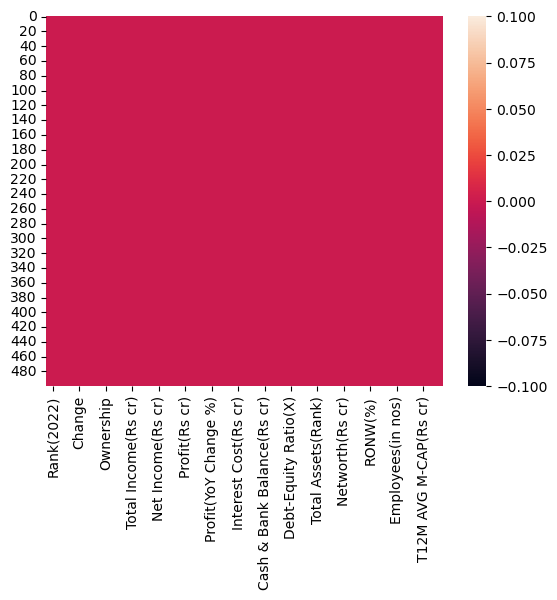

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.heatmap(required_df.isnull())
plt.show()

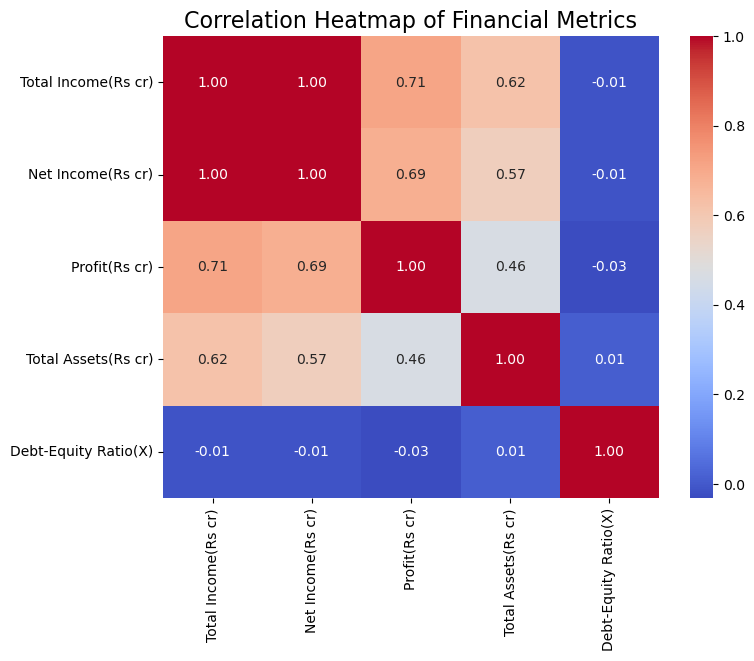

In [174]:
metrics = ["Total Income(Rs cr)", "Net Income(Rs cr)", "Profit(Rs cr)", "Total Assets(Rs cr)", "Debt-Equity Ratio(X)"]
correlation_matrix = required_df[metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Financial Metrics", fontsize=16)
plt.show()

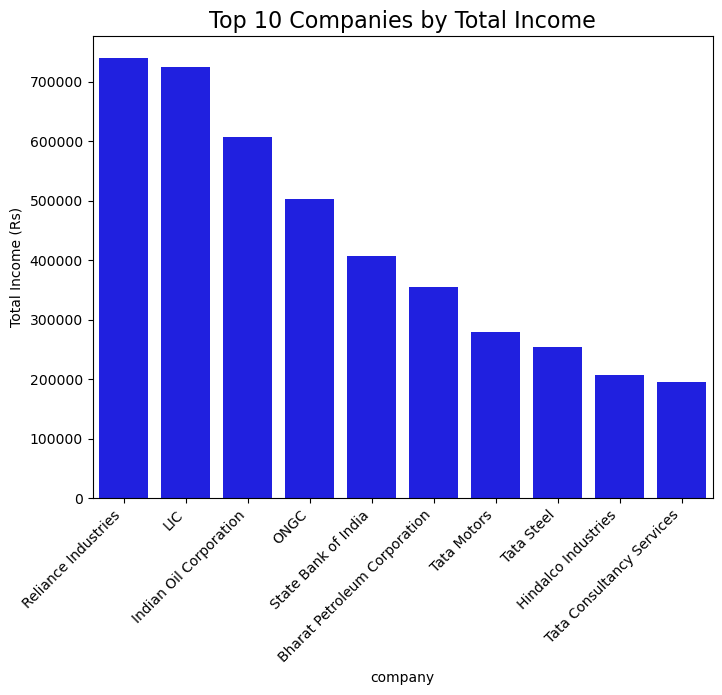

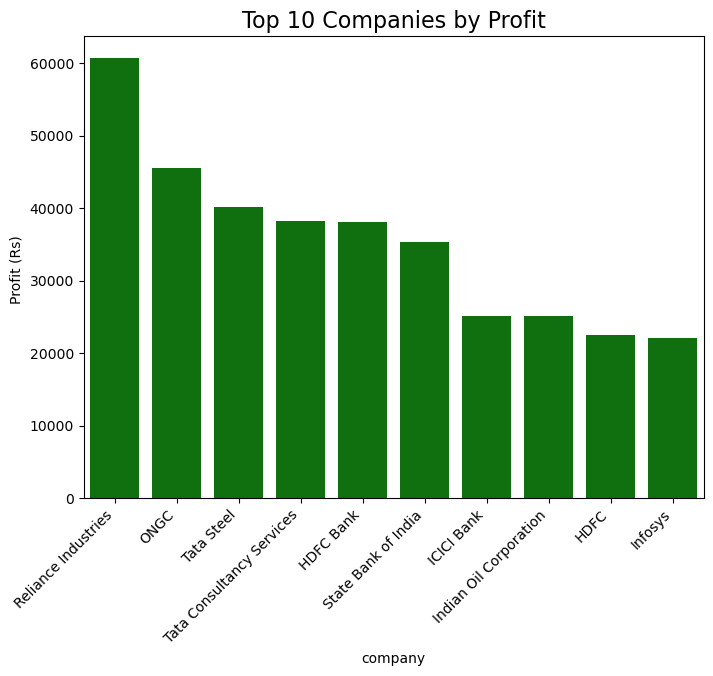

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns


top_income = required_df.nlargest(10, "Total Income(Rs cr)")
top_profit = required_df.nlargest(10, "Profit(Rs cr)")


plt.figure(figsize=(8, 6))
sns.barplot(data=top_income, x="Company", y="Total Income(Rs cr)", color="blue")
plt.title("Top 10 Companies by Total Income", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.xlabel("company")
plt.ylabel("Total Income (Rs)")
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(data=top_profit, x="Company", y="Profit(Rs cr)", color="green")
plt.title("Top 10 Companies by Profit", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.xlabel("company")
plt.ylabel("Profit (Rs) ")
plt.show()

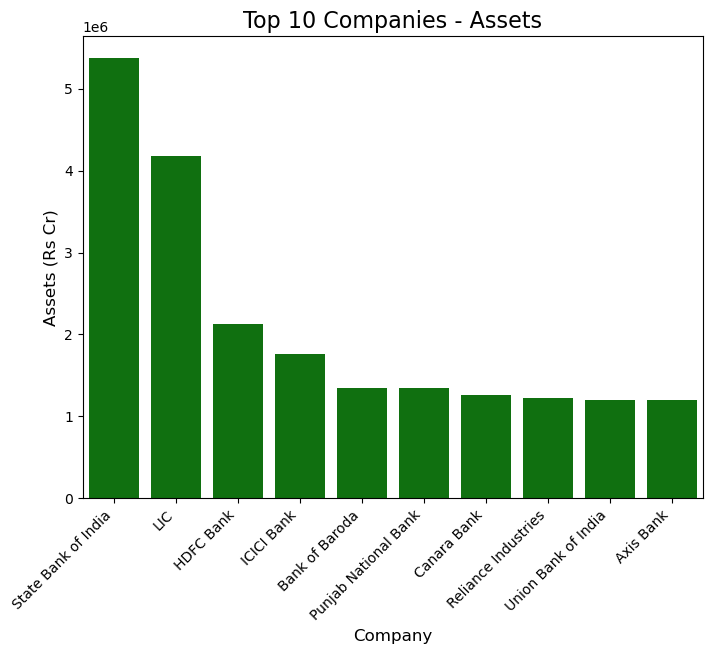

In [346]:
top_10_assets = required_df.nlargest(10, "Total Assets(Rs cr)")

plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=top_10_assets, 
    x="Company", 
    y="Total Assets(Rs cr)", 
    color="green"  )

plt.title("Top 10 Companies - Assets", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Assets (Rs Cr)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

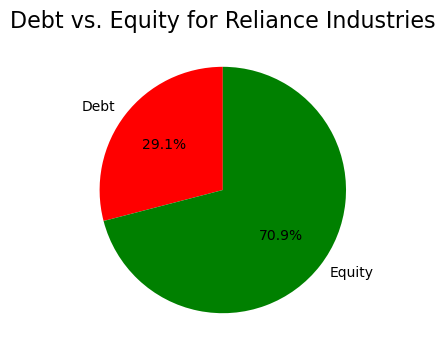

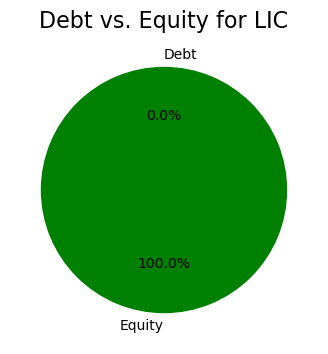

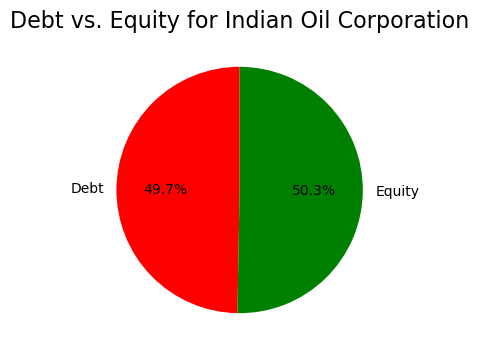

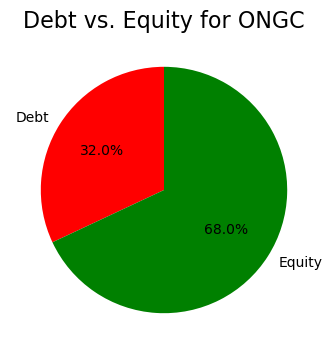

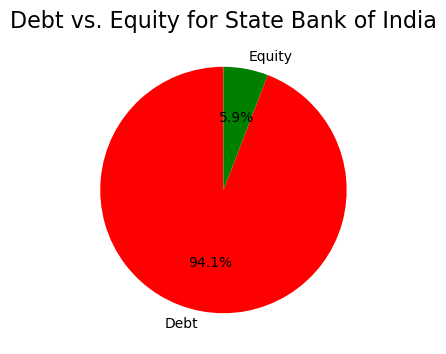

In [134]:
#1
top_company = required_df.iloc[0]
debt_equity_share = [top_company["Total Debt(Rs cr)"], top_company["Networth(Rs cr)"]]

plt.figure(figsize=(4, 4))
plt.pie(debt_equity_share, labels=["Debt", "Equity"], autopct='%1.1f%%', startangle=90, colors=["red", "green"])
plt.title(f"Debt vs. Equity for {top_company['Company']}", fontsize=16)
plt.show() 

#2
top_company = required_df.iloc[1]
debt_equity_share = [top_company["Total Debt(Rs cr)"], top_company["Networth(Rs cr)"]]

plt.figure(figsize=(4, 4))
plt.pie(debt_equity_share, labels=["Debt", "Equity"], autopct='%1.1f%%', startangle=90, colors=["red", "green"])
plt.title(f"Debt vs. Equity for {top_company['Company']}", fontsize=16)
plt.show() 

#3
top_company = required_df.iloc[2]
debt_equity_share = [top_company["Total Debt(Rs cr)"], top_company["Networth(Rs cr)"]]

plt.figure(figsize=(4, 4))
plt.pie(debt_equity_share, labels=["Debt", "Equity"], autopct='%1.1f%%', startangle=90, colors=["red", "green"])
plt.title(f"Debt vs. Equity for {top_company['Company']}", fontsize=16)
plt.show() 

#4
top_company = required_df.iloc[3]
debt_equity_share = [top_company["Total Debt(Rs cr)"], top_company["Networth(Rs cr)"]]

plt.figure(figsize=(4, 4))
plt.pie(debt_equity_share, labels=["Debt", "Equity"], autopct='%1.1f%%', startangle=90, colors=["red", "green"])
plt.title(f"Debt vs. Equity for {top_company['Company']}", fontsize=16)
plt.show() 

#5
top_company = required_df.iloc[4]
debt_equity_share = [top_company["Total Debt(Rs cr)"], top_company["Networth(Rs cr)"]]

plt.figure(figsize=(4, 4))
plt.pie(debt_equity_share, labels=["Debt", "Equity"], autopct='%1.1f%%', startangle=90, colors=["red", "green"])
plt.title(f"Debt vs. Equity for {top_company['Company']}", fontsize=16)
plt.show() 

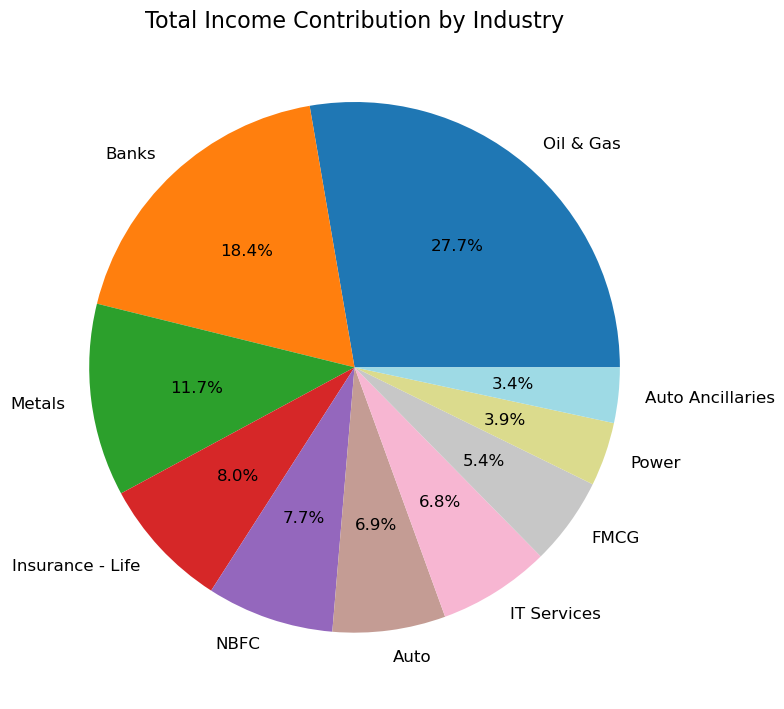

Top Contributing Companies:
Company
Reliance Industries             739518
Indian Oil Corporation          607365
ONGC                            502474
Bharat Petroleum Corporation    355772
Nayara Energy  ^                 97354
Name: Total Income(Rs cr), dtype: int64
Top Contributing Companies:
Company
State Bank of India     406973
HDFC Bank               167695
ICICI Bank              157536
Canara Bank              94257
Punjab National Bank     88571
Name: Total Income(Rs cr), dtype: int64
Top Contributing Companies:
Company
Tata Steel                  253797
Hindalco Industries         206795
JSW Steel                   152420
Vedanta                     137381
Steel Authority of India    105033
Name: Total Income(Rs cr), dtype: int64


In [326]:
industry_income = required_df.groupby('Industry')['Total Income(Rs cr)'].sum()

plt.figure(figsize=(8, 8))
industry_income.sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%', colormap='tab20', fontsize=12)
plt.title('Total Income Contribution by Industry', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

top_3_industries = top_industries.head(3).index
for industry in top_3_industries:
    industry_data = required_df[required_df['Industry'] == industry]
    company_contribution = industry_data.groupby('Company')['Total Income(Rs cr)'].sum()
    print("Top Contributing Companies:")
    print(company_contribution.sort_values(ascending=False).head(5))

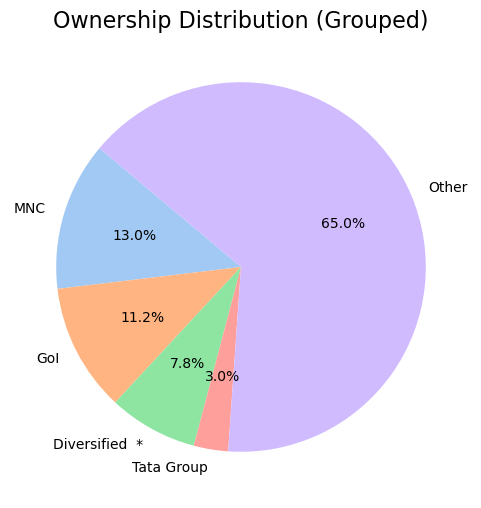

In [332]:
threshold = 0.02  # Combine categories that represent less than 2% of the total
ownership_counts = required_df["Ownership"].value_counts(normalize=True)
large_ownership = ownership_counts[ownership_counts >= threshold]
small_ownership = ownership_counts[ownership_counts < threshold]

ownership_counts_grouped = large_ownership.copy()
ownership_counts_grouped["Other"] = small_ownership.sum()

plt.figure(figsize=(6, 6))
ownership_counts_grouped.plot.pie(
    autopct="%1.1f%%", 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
plt.title("Ownership Distribution (Grouped)", fontsize=16)
plt.ylabel("")
plt.show()
